In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import re
import glob
import sklearn.cluster
from pandas import Series, DataFrame

In [19]:
path = 'C:/Users/JAYANK/Desktop/aspiration ai internship/Stocks'
csv_list = []

for filename in os.listdir(path):
    if filename.endswith('.csv'):
        csv_list.append(filename)
df2=pd.DataFrame()

In [20]:
csv_new_list=[]
for i in csv_list:
    x=str(i[:-4])
    csv_new_list.append(x)
    

In [21]:
csv_new_list

['ASHOKA',
 'BAJAJELEC',
 'BOMDYEING',
 'CENTURYPLY',
 'FORTIS',
 'GUJALKALI',
 'IDFC',
 'INFY',
 'IOC',
 'IRCON',
 'ITC',
 'ITDC',
 'JETAIRWAYS',
 'LT',
 'M&M',
 'MARUTI',
 'MRPL',
 'MUTHOOTFIN',
 'NBCC',
 'PNB',
 'RBLBANK',
 'RELIANCE',
 'RELINFRA',
 'SUNPHARMA',
 'SUNTV',
 'TATACHEM',
 'TATAPOWER',
 'TCS',
 'TITAN',
 'VOLTAS']

In [22]:
for i in csv_new_list:
    df=pd.read_csv("C:/Users/JAYANK/Desktop/aspiration ai internship/Stocks/{}.csv".format(i))
    df2[i]=df['Close Price']
    df2['Date']=df['Date']
df2.set_index('Date',inplace=True)

In [23]:
# df2 is the dataframe which contains 30 companies close prices including low,mid,high
df2.fillna(0,inplace=True)
df2

,ASHOKA,BAJAJELEC,BOMDYEING,CENTURYPLY,FORTIS,GUJALKALI,IDFC,INFY,IOC,IRCON,...,RBLBANK,RELIANCE,RELINFRA,SUNPHARMA,SUNTV,TATACHEM,TATAPOWER,TCS,TITAN,VOLTAS
Date,,,,,,,,,,,,,,,,,,,,,
15-May-2017,216.05,341.15,82.20,266.65,205.25,457.35,63.70,951.55,442.10,415.3,...,563.90,1344.10,605.40,654.45,912.20,629.80,83.55,2365.10,483.65,431.85
16-May-2017,214.90,347.00,83.40,266.10,207.90,455.25,64.25,955.00,446.60,427.0,...,562.60,1356.30,611.05,652.35,894.70,643.90,83.85,2429.15,488.30,432.45
17-May-2017,217.00,349.85,82.25,264.85,205.90,472.65,63.35,952.80,444.25,421.4,...,564.25,1353.10,605.25,650.90,887.05,638.10,85.35,2455.35,481.75,430.20
18-May-2017,209.65,334.10,78.95,260.35,196.85,461.85,61.50,961.75,439.90,407.1,...,552.15,1327.35,578.65,653.95,871.35,624.90,83.75,2536.20,471.65,414.10
19-May-2017,206.25,336.20,77.15,254.05,203.55,455.35,61.15,957.95,435.40,399.8,...,555.45,1318.85,569.55,653.15,852.40,616.45,84.15,2507.15,471.15,415.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
07-May-2019,118.10,557.75,121.45,163.15,136.35,545.85,37.75,723.60,156.70,0.0,...,665.95,1384.90,100.90,453.15,551.10,577.15,65.85,2260.35,1145.05,601.45
08-May-2019,115.45,534.45,119.35,161.30,135.20,522.90,37.10,718.40,153.45,0.0,...,652.80,1343.50,99.45,448.20,528.90,576.50,64.35,2215.40,1082.85,576.65
09-May-2019,115.30,531.85,117.75,160.50,133.60,510.10,37.60,724.55,152.20,0.0,...,661.85,1299.45,101.90,439.15,540.70,556.50,64.50,2132.00,1086.50,574.10


In [26]:
portfolio=pd.DataFrame()
annual_days=252
portfolio['Return']=df2.pct_change().mean()*annual_days
portfolio['Volatility']=df2.pct_change().std()*annual_days


In [27]:
portfolio

,Return,Volatility
ASHOKA,-0.208509,7.032001
BAJAJELEC,0.316053,6.388117
BOMDYEING,0.327621,9.570256
CENTURYPLY,-0.182338,5.957206
FORTIS,-0.137297,6.690837
GUJALKALI,0.112144,6.119501
IDFC,-0.200489,5.619409
INFY,-0.022672,6.650837
IOC,-0.396386,7.929534
IRCON,-1.747589,21.048733


Text(0, 0.5, 'inertia - % change')

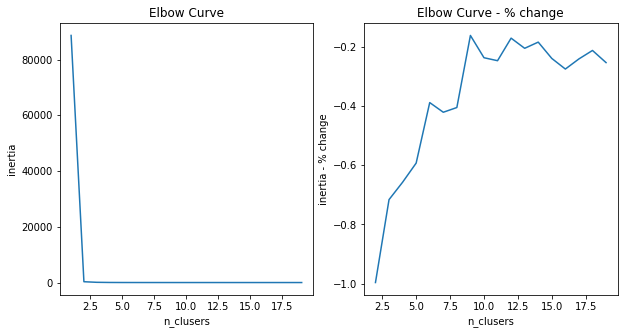

In [133]:
elbow_curve = [ None ] + [ sklearn.cluster.KMeans(n_clusters=n, random_state=0).fit(portfolio).inertia_ for n in range(1,20) ]

fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].plot( elbow_curve )
axes[0].set_title('Elbow Curve')    
axes[0].set_xlabel('n_clusters')
axes[0].set_ylabel('inertia')

axes[1].plot( Series(elbow_curve).pct_change() )
axes[1].set_title('Elbow Curve - % change')    
axes[1].set_xlabel('n_clusters')
axes[1].set_ylabel('inertia - % change')

In [141]:
elbow_curve_select = [4, 9]

In [142]:
cmap = cm.get_cmap('Set1') 
def get_color(n, max=6):
    if isinstance(n, list): 
        return [ get_color(i, max) for i in n ]
    else:
        return cmap(0. + n/max)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C91C1D808>


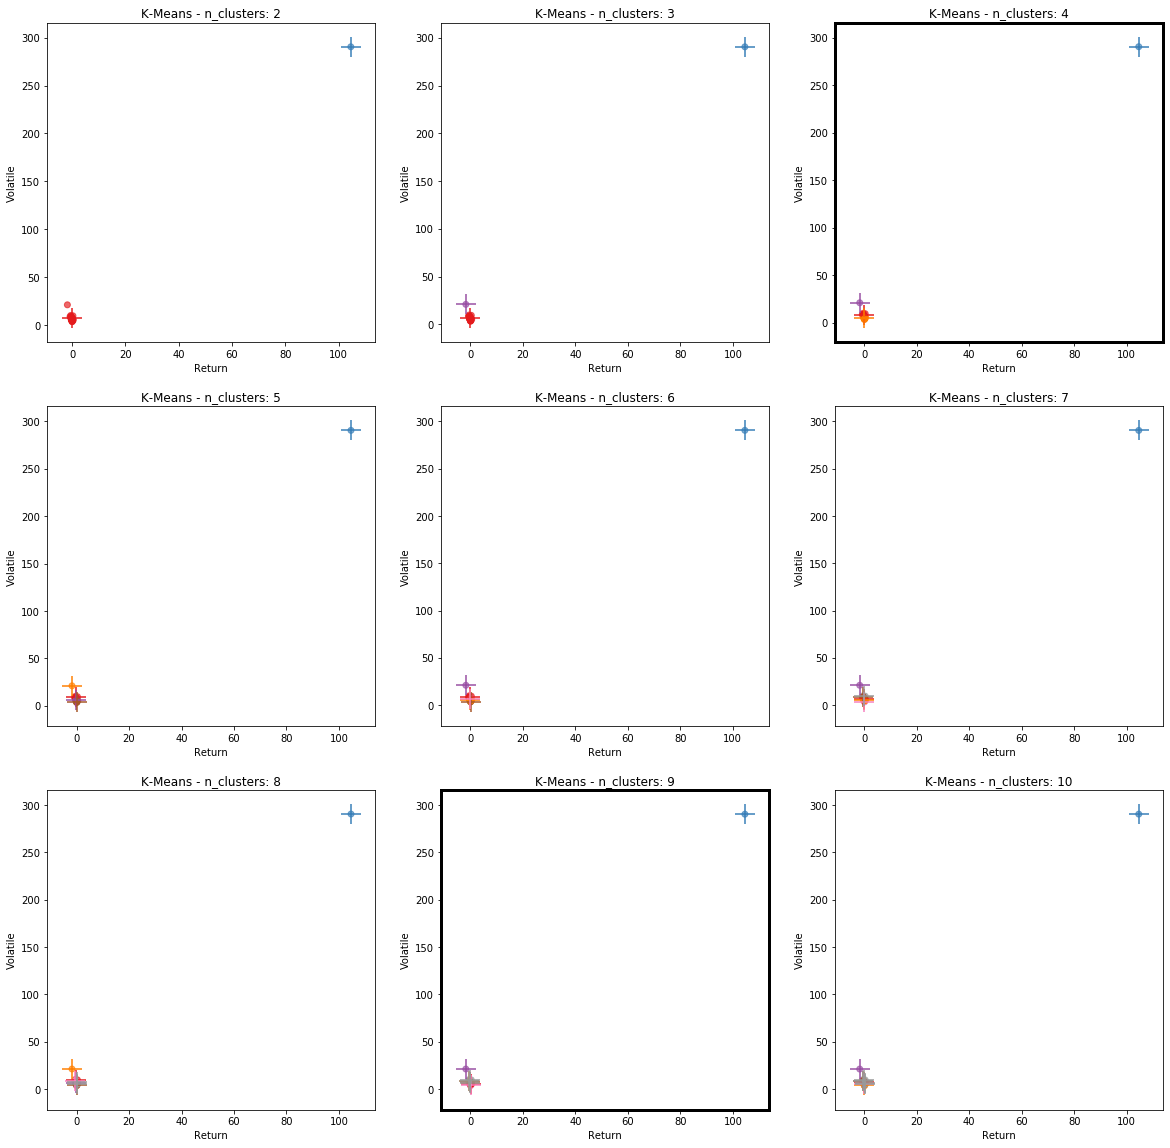

In [143]:
fig, axes = plt.subplots(3,3, figsize=(20,20))

print(axes)
portfolio_kmeans = {}
for x in range(0,len(axes)):
    for y in range(0,len(axes[0])):
        n = 2 + (len(axes[0]) * x) + y
        portfolio_kmeans[n]      = sklearn.cluster.KMeans(n_clusters=n, random_state=0).fit(portfolio)
        portfolio_kmeans_predict = portfolio_kmeans[n].predict(portfolio)

        axes[x][y].scatter(portfolio.Return,portfolio.Volatile, c=get_color(portfolio_kmeans_predict), alpha=0.66 )
        axes[x][y].set_title('K-Means - n_clusters: ' + str(n))
        axes[x][y].set_xlabel('Returns')
        axes[x][y].set_ylabel('Volatile')
        
        # Mark Cluster Centers
        for i, coords in enumerate( portfolio_kmeans[n].cluster_centers_ ):
           axes[x][y].scatter( coords[0], coords[1], s=400, marker='+', c=[ get_color(i) ] )
        
        # Add thick borders to n_clusters selected by elbow_curve
        if n in elbow_curve_select:
            for spine in axes[x][y].spines.values(): spine.set_linewidth(3)

In [144]:
for n in elbow_curve_select:
    portfolio['cluster_'+str(n)] = portfolio_kmeans[n].predict( portfolio[['Return', 'Volatile']] )
portfolio

,Return,Volatile,cluster_4,cluster_9
ASHOKA,-0.208509,7.032001,0,4
BAJAJELEC,0.316053,6.388117,3,4
BOMDYEING,0.327621,9.570256,0,6
CENTURYPLY,-0.182338,5.957206,3,7
FORTIS,-0.137297,6.690837,0,4
GUJALKALI,0.112144,6.119501,3,7
IDFC,-0.200489,5.619409,3,7
INFY,-0.022672,6.650837,0,4
IOC,-0.396386,7.929534,0,3
IRCON,-1.747589,21.048733,2,2
